In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import os, sys
from importlib import reload

import numpy as np
import numpy.linalg as la
from numpy import fft

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import AsinhStretch
from astropy.wcs import WCS
from astropy.nddata import Cutout2D
from astropy.visualization import astropy_mpl_style
from astropy.stats import sigma_clipped_stats
from astropy.nddata import NDData

stretch = AsinhStretch()

from photutils.detection import DAOStarFinder
from photutils.psf import EPSFBuilder
from photutils.psf import extract_stars

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use(astropy_mpl_style)
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['image.interpolation'] = 'none'

In [ ]:
sys.path.append('.')

import autils

Load some test data

In [ ]:
from astropy.utils.data import download_file

image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True )
# image_data = fits.getdata(image_file)
with fits.open(image_file) as hdu: 
    image_data = hdu[0].data
    image_header = hdu[0].header
    image_wcs = WCS(image_header)

In [6]:
%matplotlib widget

In [28]:
%matplotlib inline

In [39]:
plt.get_backend()

'inline'

In [16]:
reload(autils.jupyter)

%matplotlib inline

image_data_small = image_data[::10, ::10]

autils.jupyter.interactive_plot(image_data_small, wcs=image_wcs)

Output()

calling __init__
calling __initialize_widgets
calling __setup_widgets


calling __initialize_plot
calling __setup_fig
calling __setup_ax
calling __parse_scale_range
calling __parse_scale_slider
calling __parse_scale_norm
calling __setup_im
calling __setup_cbar
calling __setup_markers
calling __create_marker_path
calling __create_marker_path


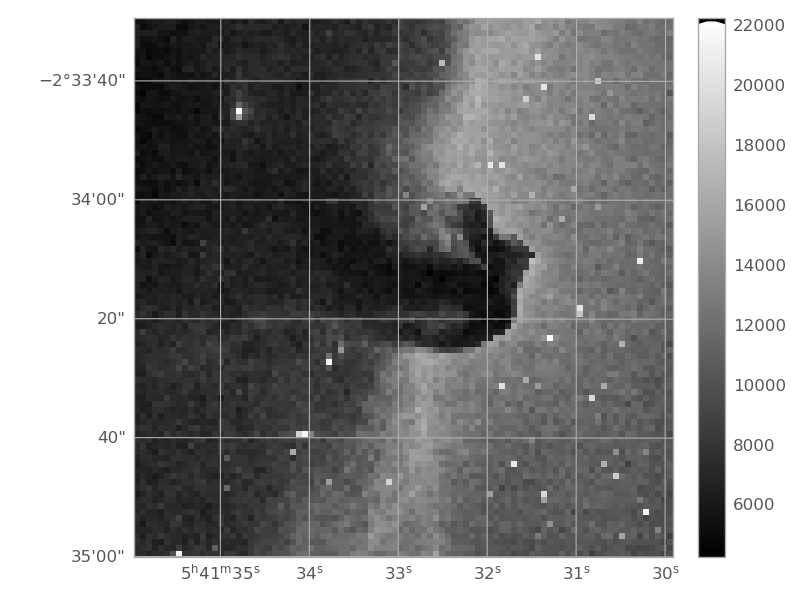

calling __update_show_grid
calling __update_show_grid
calling __update_coordinate
calling __setup_ax
calling __setup_im
calling __setup_cbar
calling __setup_markers
calling __create_marker_path
calling __create_marker_path
calling __update_coordinate
calling __setup_ax
calling __setup_im
calling __setup_cbar
calling __setup_markers
calling __create_marker_path
calling __create_marker_path
calling __update_scale_range
calling __parse_scale_range
calling __parse_scale_slider
calling __parse_scale_norm
calling __update_scale_range
calling __parse_scale_range
calling __parse_scale_slider
calling __parse_scale_norm
calling __update_scale_norm
calling __parse_scale_norm
calling __update_scale_slider
calling __parse_scale_slider
calling __parse_scale_norm
calling __update_scale_slider
calling __parse_scale_slider
calling __parse_scale_norm
calling __update_scale_slider
calling __parse_scale_slider
calling __parse_scale_norm
calling __update_scale_slider
calling __parse_scale_slider
calling __

In [35]:
import autils.jupyter_fast
import autils.jupyter_oop

%matplotlib widget

reload(autils.autils)
reload(autils)
reload(autils.jupyter_oop)

image_data_small = image_data[::10, ::10]

autils.jupyter_oop.InteractivePlot(image_data_small, wcs=image_wcs)

calling interactive_plot


calling __initialize_plot
calling __setup_fig
calling __setup_ax
calling __setup_im
calling __setup_cbar


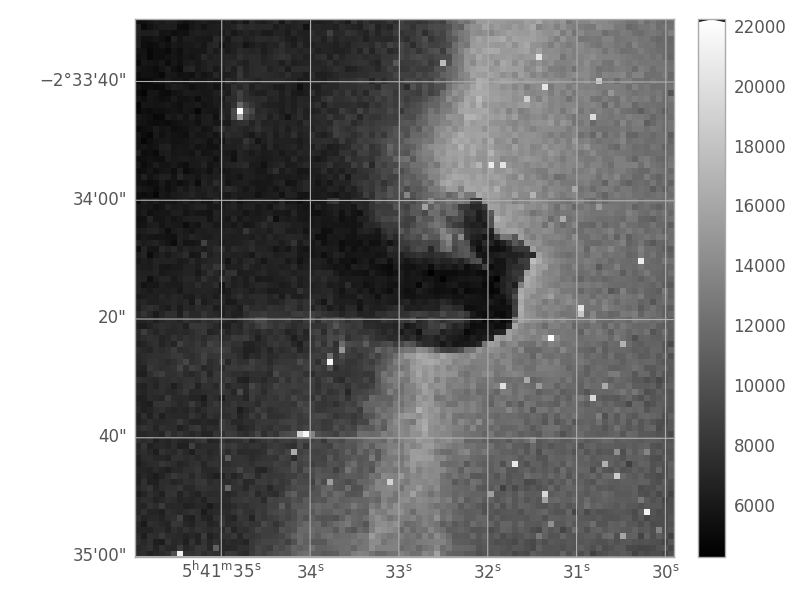

calling __update_scale_slider
calling __update_coordinate
calling __setup_ax
calling __update_plot
calling __update_coordinate
calling __setup_ax
calling __update_plot
calling __update_coordinate
calling __setup_ax
calling __update_plot
calling __update_coordinate
calling __setup_ax
calling __update_plot
calling __update_scale_slider


In [83]:
import autils.jupyter_fast


reload(autils.autils)
reload(autils)
reload(autils.jupyter_fast)

image_data_small = image_data[::10, ::10]

autils.jupyter_fast.interactive_plot(image_data_small, wcs=image_wcs)

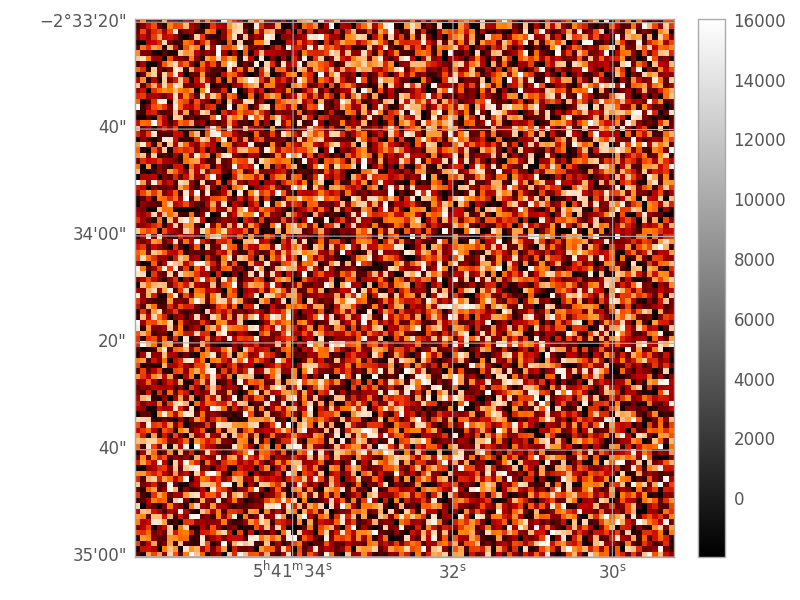

In [29]:
%matplotlib inline

from autils.autils import TemporaryMatplotlibConfig

with TemporaryMatplotlibConfig(backend='widget'):

    plt.imshow(np.random.rand(100, 100))
    plt.show()

In [21]:
plt.get_backend()

'inline'

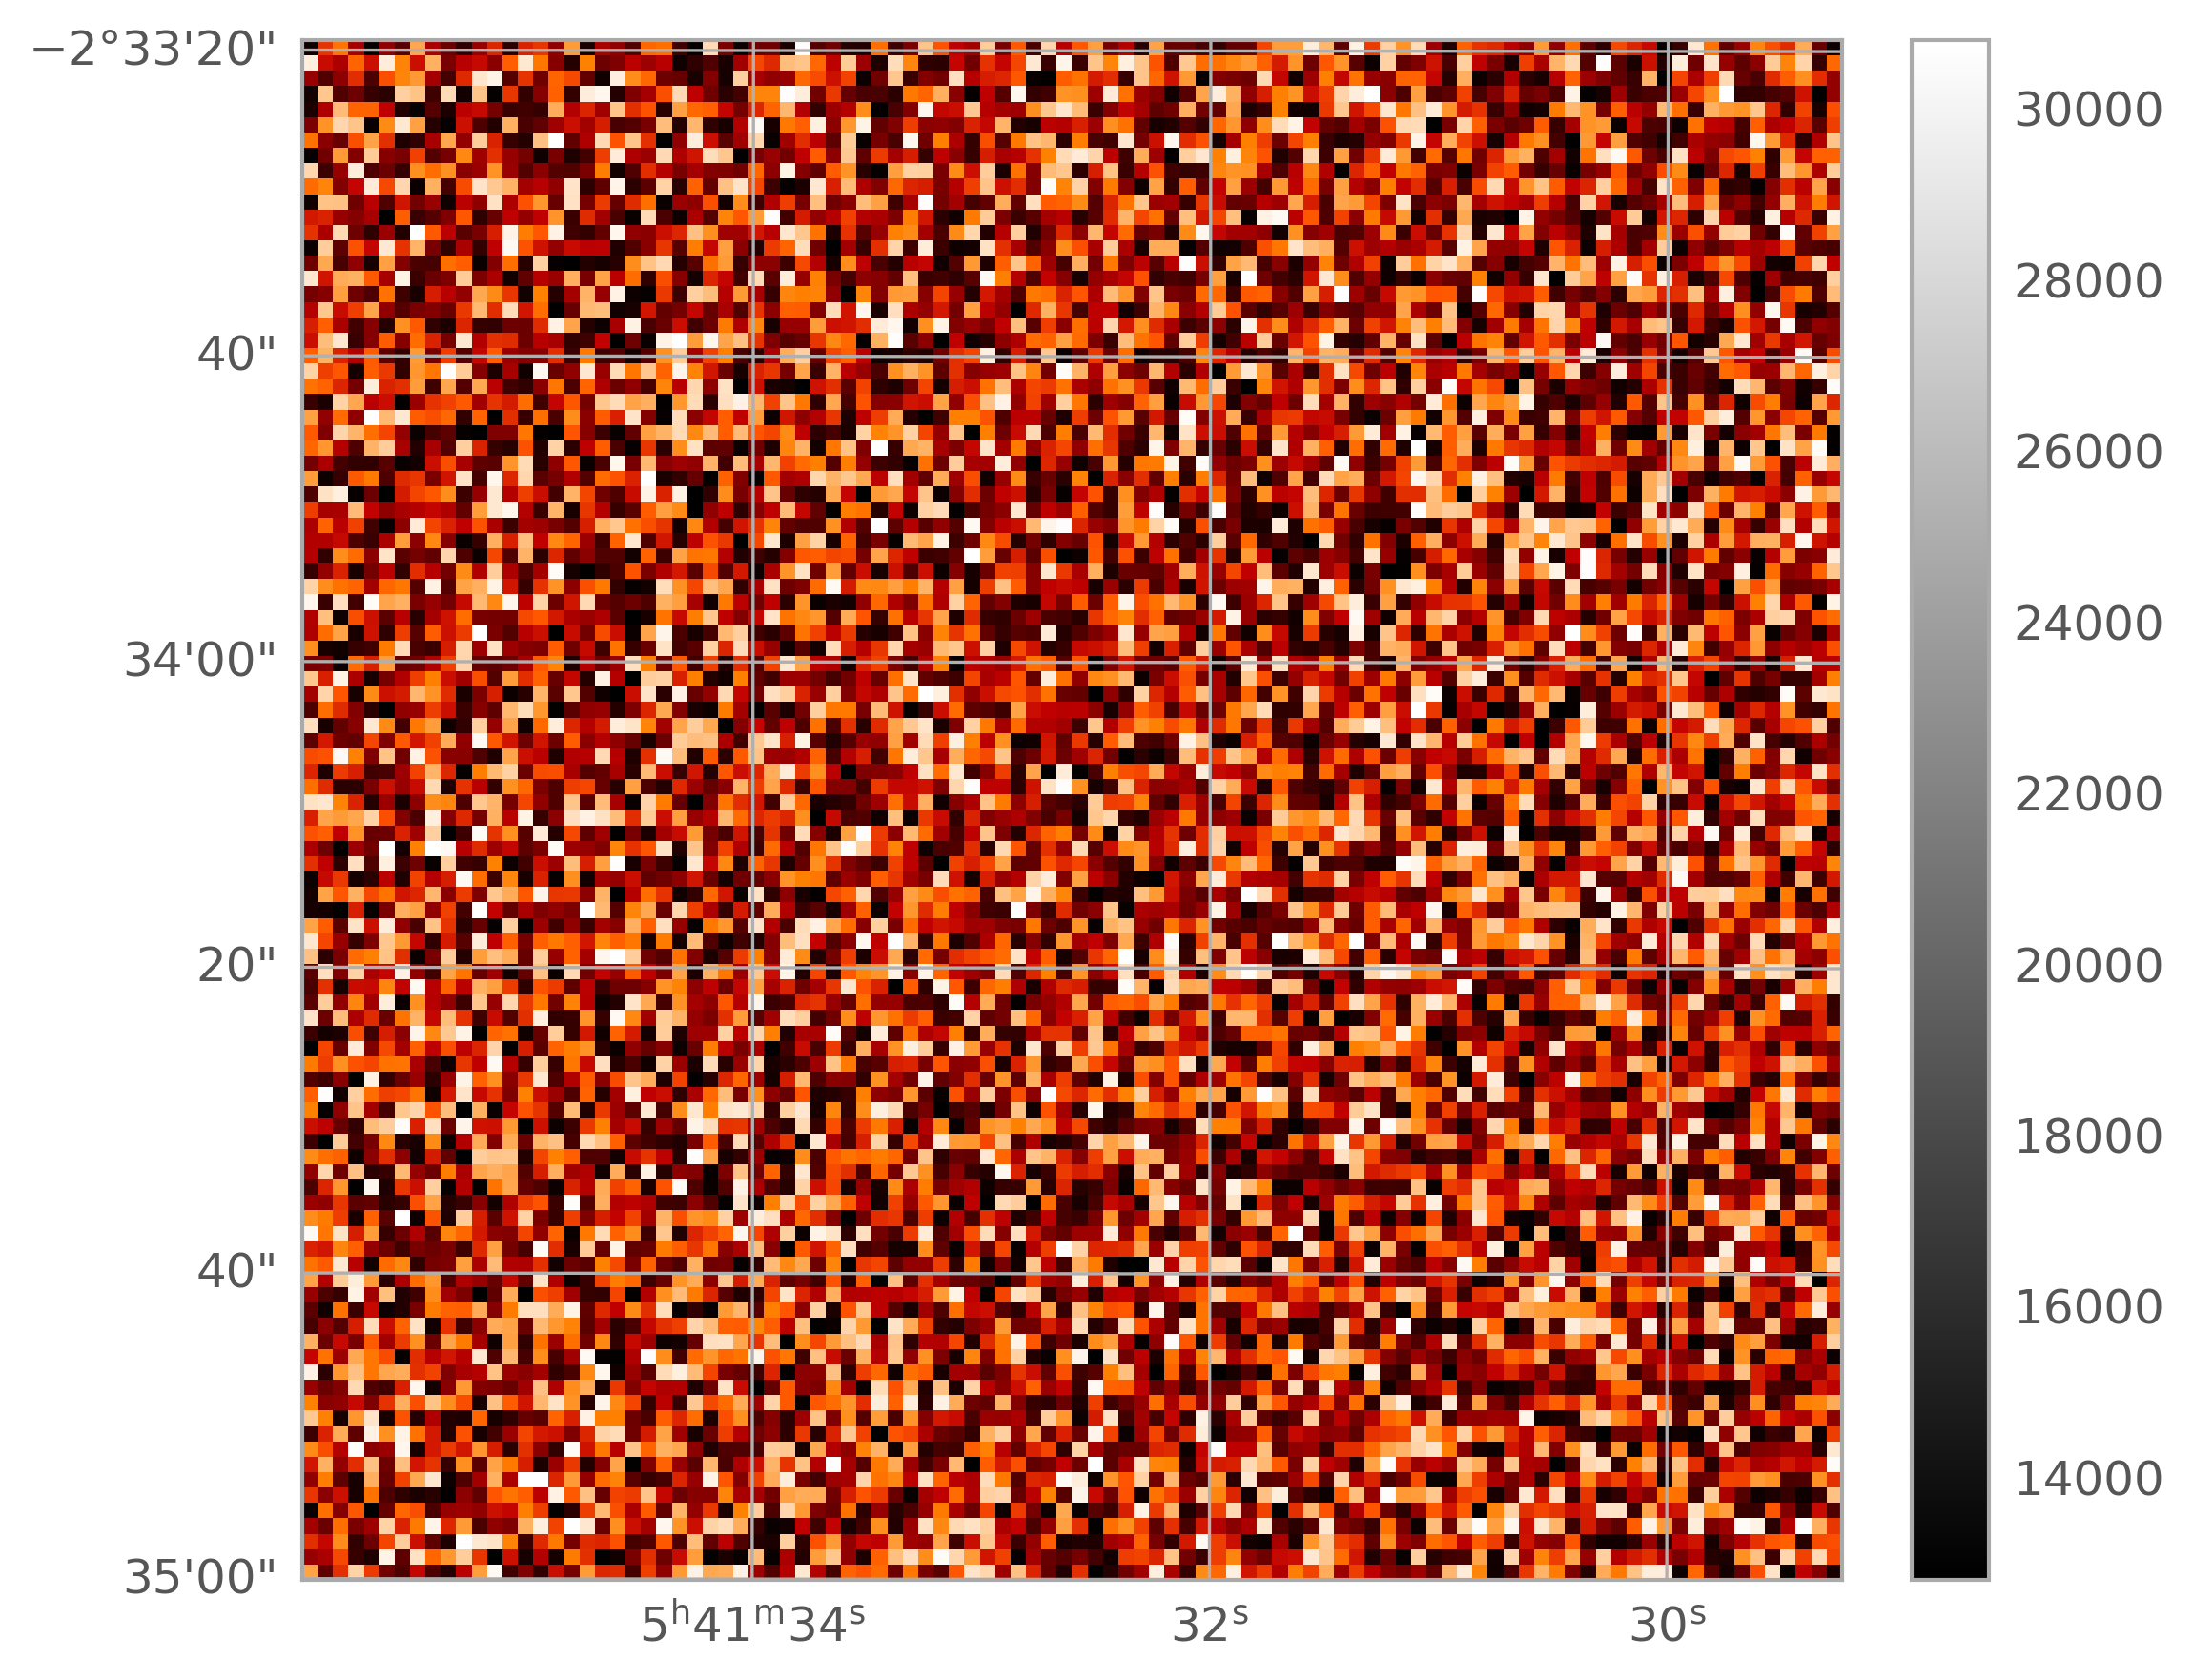

In [10]:

plt.imshow(np.random.rand(100, 100))
plt.show()

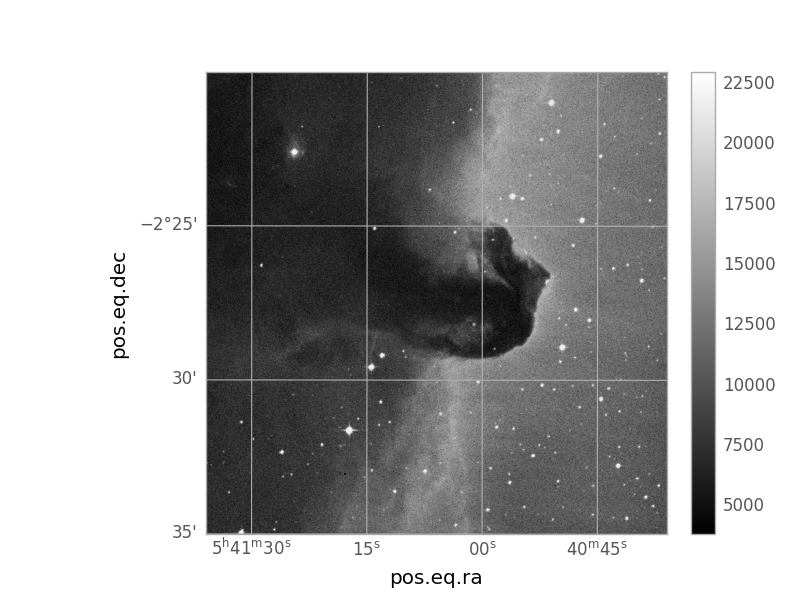

In [ ]:
import ipywidgets as widgets
from ipywidgets import Layout
from IPython.display import display, HTML
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from astropy.visualization import ImageNormalize, LinearStretch, AsinhStretch, ZScaleInterval, HistEqStretch, LogStretch, PowerDistStretch, SinhStretch, SqrtStretch, SquaredStretch

import matplotlib.patches as patches

def interactive_plot(data, wcs=None):

    def __create_triangle(x, y, l, h):
        triangle = patches.Polygon([[x, y+h], [x-l/2, y], [x+l/2, y]], 
                                closed=True, color='k')
        return triangle

    def __reset_slider(slider, value): 
        slider.value = value

    
    scale_method = widgets.ToggleButtons(
        options=[('asinh', AsinhStretch), 
                 ('histogram', HistEqStretch), 
                 ('linear', LinearStretch), 
                 ('log', LogStretch), 
                 ('power dist', PowerDistStretch), 
                 ('sinh', SinhStretch), 
                 ('sqrt', SqrtStretch), 
                 ('squared', SquaredStretch)],
        value=LinearStretch, 
        layout=Layout(width='80%', height='33px'), 
        description='',
        disabled=False, 
        style={'button_width': '11.8%'}
    )

    scale_range = widgets.ToggleButtons(
        options=['min max', 'zscale'],
        value='min max',
        layout=Layout(width='20%', height='33px'), 
        description='',
        disabled=False, 
        style={'button_width': '47%'}
    )

    scale_slider = widgets.FloatSlider(
        value=0,
        min=-1,
        max=1,
        step=0.005,
        description='',
        continuous_update=True,
        readout=False,
        layout=Layout(width='50%')
    )

    reset_button = widgets.Button(
        description='reset',
        layout=Layout(width='10%')
    )
    reset_button.on_click(lambda b: __reset_slider(scale_slider, 0))

    colormap = widgets.Dropdown(
        options=['gist_heat', 'grey', 'seismic'],
        value='grey',
        description='',
        disabled=False,
        layout=Layout(width='10%'), 
    )

    show_grid = widgets.ToggleButton(
        value=True,
        description='grid',
        disabled=False,
        button_style='',
        tooltip='Description',
        icon='check',
        layout=Layout(width='10%'), 
    )

    no_wcs = wcs is None
    coordinate = widgets.ToggleButtons(
        options=['image', 'world'],
        value='world',
        layout=Layout(width='20%', height='33px'), 
        description='',
        disabled=no_wcs, 
        style={'button_width': '47%'}
    )
    # define ui

    ui1 = widgets.HBox([scale_method, scale_range])
    ui2 = widgets.HBox([reset_button, scale_slider, 
                        colormap, show_grid, coordinate])
    ui = widgets.VBox([ui1, ui2])

    #########

    global fig, ax_world, ax_image, im_world, im_image, cbar  # Declare global variables

    # Initialize figure
    fig = plt.figure(figsize=[8, 6])

    # Create two Axes: one for WCS projection and one for image projection
    ax_world = fig.add_subplot(111, projection=wcs) if wcs else None
    ax_image = fig.add_subplot(111)

    # Toggle Axes visibility based on initial coordinate value
    ax_world.set_visible(coordinate.value == 'world') if ax_world else None
    ax_image.set_visible(coordinate.value == 'image')

    # Helper function to set up the plot content on both Axes
    def __initialize_plot_content(scale_method=LinearStretch, 
                                  scale_range='min max', 
                                  scale_slider=0, 
                                  colormap='grey', 
                                  show_grid=True):
        global im_world, im_image, cbar  # Access global variables for images and colorbar

        # Determine color limits and normalization
        if scale_range == 'min max':
            vmin = np.min(data)
            vmax = np.max(data)
        elif scale_range == 'zscale':
            zscale_interval = ZScaleInterval()
            vmin, vmax = zscale_interval.get_limits(data)
        else:
            raise ValueError(f'Not a valid scale_range: {scale_range}')

        offset = scale_slider * (vmax - vmin)
        vmax_shifted = vmax - offset
        vmin_shifted = vmin - offset

        args = [data] if scale_method == HistEqStretch else []
        norm = ImageNormalize(stretch=scale_method(*args), vmin=vmin_shifted, vmax=vmax_shifted)

        # Plot data on both Axes but keep one hidden
        if ax_world:
            im_world = ax_world.imshow(data, interpolation='none', cmap=colormap, norm=norm)
            ax_world.grid(show_grid)

        im_image = ax_image.imshow(data, interpolation='none', cmap=colormap, norm=norm)
        ax_image.grid(show_grid)

        # Remove any existing colorbar and add a new one
        # if cbar is not None:
        #     cbar.remove()
        active_ax = ax_world if coordinate.value == 'world' and ax_world else ax_image
        cbar = fig.colorbar(im_world if active_ax is ax_world else im_image, ax=active_ax, fraction=0.046, pad=0.04)

        fig.canvas.draw_idle()

    # Function to toggle between the two Axes based on the coordinate setting
    def __update_coordinate(change):
        if coordinate.value == 'world' and ax_world:
            ax_world.set_visible(True)
            ax_image.set_visible(False)
        elif coordinate.value == 'image':
            ax_image.set_visible(True)
            if ax_world:
                ax_world.set_visible(False)
        fig.canvas.draw_idle()

    # Function to update plot settings without reinitializing the Axes
    def __update_plot(change):
        __initialize_plot_content(scale_method=scale_method.value, 
                                  scale_range=scale_range.value, 
                                  scale_slider=scale_slider.value, 
                                  colormap=colormap.value, 
                                  show_grid=show_grid.value)

    # Display UI and initialize plot content
    display(ui)
    __initialize_plot_content()

    # Link widgets to update functions
    scale_method.observe(__update_plot, names='value')
    scale_range.observe(__update_plot, names='value')
    scale_slider.observe(__update_plot, names='value')
    colormap.observe(__update_plot, names='value')
    show_grid.observe(__update_plot, names='value')
    coordinate.observe(__update_coordinate, names='value')

interactive_plot(image_data, wcs=image_wcs)